In [1]:
import json
import datetime
import networkx as nx

# for the drawing
from networkx.drawing.nx_agraph import graphviz_layout
import matplotlib.pyplot as plt

In [2]:
def date_hook(json_dict):
    try:
        json_dict['timestamp'] = datetime.datetime.strptime(json_dict['timestamp'], "%Y-%m-%dT%H:%M:%SZ")
    except:
        pass
    return json_dict

In [3]:
class DiscussionGraph:
    def __init__(self, root_label='root', root_color='yellow'):
        self.G = nx.DiGraph()
        self.add_node(
            root_label,
            root_label,
            None,
            None,
            None,
            None,
            root_color
        )
        
    def add_node(self, label, action_type, parent_id, ancestor_id, replyto_id, timestamp, color):
        if label is None:
            print('Errore')
            print(label, action_type, parent_id, ancestor_id, replyto_id, timestamp, color)
        self.G.add_node(
            label,
            action=action_type,
            parent_id=parent_id,
            ancestor_id=ancestor_id,
            replyto_id=replyto_id,
            timestamp=timestamp,
            color=color
        )
        
    
    def is_node_inside(self, node):
        return node in self.G.nodes
    
    
    def add_edge(self, node_from, node_to):
        for node in [node_from, node_to]:
            if not self.is_node_inside(node):
                self.add_node(
                    node,
                    'unknown1',
                    None,
                    None,
                    None,
                    None,
                    'pink'
                )
                
        self.G.add_edge(node_from, node_to)
        
    def get_node(self, node_label):
        return self.G.nodes[node_label]
        
    def get_graph(self):
        return self.G
    
    def get_color_list(self):
        return [attributes['color'] for node, attributes in self.G.nodes.data()]
    
    def reset(self):
        self.G.reset()

Reply_To: 14671066.25446.25446
parent_id: 16253465.0.0
parent_id: 20995153.174784.174762
Reply_To: 29549310.13229.13237
Reply_To: 30946035.37805.37646
Reply_To: 30963887.47972.47957
Reply_To: 30963887.45445.45435
Reply_To: 31145172.106246.106246
Reply_To: 110439476.77022.77053
Reply_To: 110439476.77022.77053
Reply_To: 110439476.77022.77053


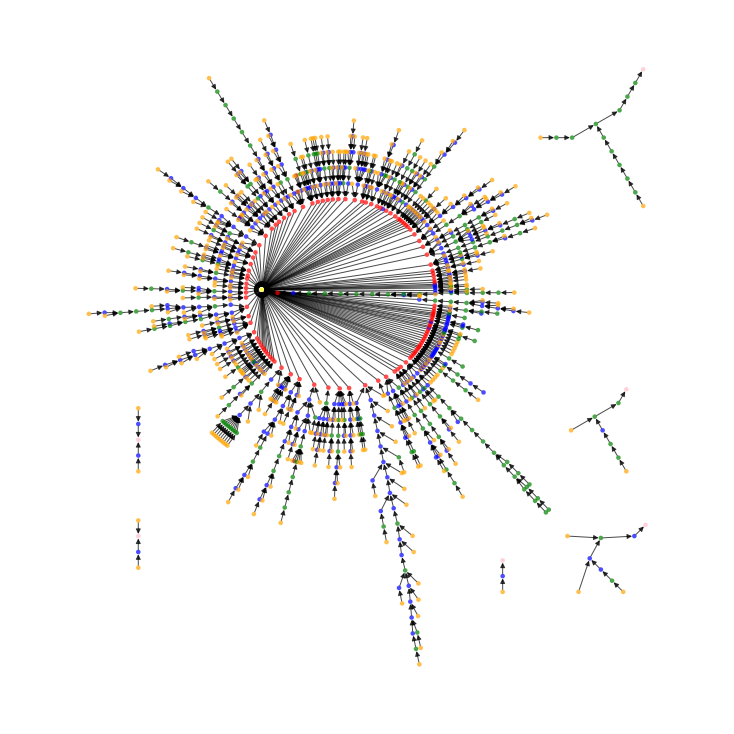

In [14]:
def create_wikiconv_graph(file_path):
    root_node = 'root'
    G = DiscussionGraph()
    
    mapper = {
        'CREATION': 'red',
        'ADDITION': 'blue',
        'MODIFICATION': 'green',
        'RESTORATION': 'brown',
        'DELETION': 'orange'
    }
    
    with open(file_path) as file:
        for line in file:
            record = json.loads(line, object_hook=date_hook)
            
            # get metadata about current line
            username = ''
            if 'user' in record and 'text' in record['user']:
                username = record['user']['text']
            elif 'user' in record and 'ip' in record['user']:
                username = record['user']['ip']
            else:
                username = 'unknown'

            current_month_year = f"{record['timestamp'].month}/{record['timestamp'].year}"
            reply_to = record['replytoId'] if 'replytoId' in record else None
            parent_id = record['parentId'] if 'parentId' in record else None
            ancestor_id = record['ancestorId'] if 'ancestorId' in record else None
                
            curr_id = record['id']
            G.add_node(
                curr_id,
                record['type'],
                parent_id,
                ancestor_id,
                reply_to,
                record['timestamp'],
                mapper[record['type']]
            )
            
            if reply_to and not G.is_node_inside(reply_to):
                print(f"Reply_To: {reply_to}")
                
            if parent_id and not G.is_node_inside(parent_id):
                print(f"parent_id: {parent_id}")
            
            if record['type'] in ['CREATION', 'ADDITION']:
                if reply_to != None:
                    G.add_edge(curr_id, reply_to)
                else:
                    G.add_edge(curr_id, root_node)
                    
            elif record['type'] in ['MODIFICATION', 'DELETION', 'RESTORATION']:
                if parent_id != None:
                    G.add_edge(curr_id, parent_id)
                else:
                    G.add_edge(curr_id, root_node)
    
    pos = graphviz_layout(G.get_graph(), prog="twopi", args="")
    
    scale = 7
    for key in pos.keys():
        a, b = pos[key]
        pos[key] = (a*scale, b*scale)
    
    plt.figure(figsize=(10, 10))
    nx.draw(
        G.get_graph(),
        pos,
        node_size=20,
        alpha=0.7,
        node_color=G.get_color_list(),
        with_labels=False,
        font_size=10,
        font_color='black',
        linewidths=0.05
    )
    
    plt.axis("equal")
    plt.show()


create_wikiconv_graph('examples/filosofia.json')
#'CREATION': 'red', 'ADDITION': 'blue', 'MODIFICATION': 'green', 'RESTORATION': 'brown', 'DELETION': 'orange'

Reply_To: 14671066.25446.25446
ancestor_id: 16253465.0.0
parent_id: 16253465.0.0
ancestor_id: 16253497.0.0
ancestor_id: 18662925.0.0
ancestor_id: 20607032.0.0
ancestor_id: 20616524.0.0
ancestor_id: 20616524.0.0
ancestor_id: 20715462.0.0
ancestor_id: 20995153.174784.174762
parent_id: 20995153.174784.174762
ancestor_id: 20929914.0.0
ancestor_id: 24803895.0.0
Reply_To: 29549310.13229.13237
Reply_To: 30946035.37805.37646
Reply_To: 30963887.47972.47957
Reply_To: 30963887.45445.45435
ancestor_id: 29443918.0.0
ancestor_id: 20715462.108.108
Reply_To: 31145172.106246.106246
ancestor_id: 31040650.0.0
ancestor_id: 31040660.101.101
Reply_To: 110439476.77022.77053
['root', '877398.0.0', '877408.0.0', '877420.1184.1184', '879156.0.0', '879168.0.0', '879170.0.0', '1445161.1503.1503', '1445181.2011.2011', '1445186.2011.2011', '1445251.2003.2003', '1445257.2354.2354', '1445264.2003.2003', '1445264.2353.2354', '1720099.2741.2741', '2811581.3083.3083', '3060096.3770.3770', '3060096.3791.3770', '4826860.3

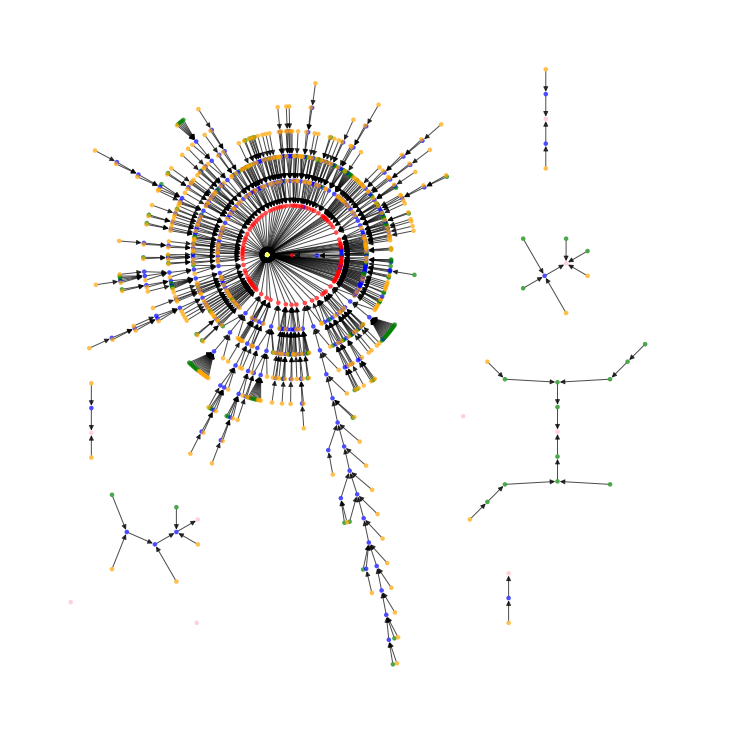

In [11]:
def create_discussion_graph(file_path):
    root_node = 'root'
    G = DiscussionGraph()
    
    mapper = {
        'CREATION': 'red',
        'ADDITION': 'blue',
        'MODIFICATION': 'green',
        'RESTORATION': 'brown',
        'DELETION': 'orange'
    }
    
    with open(file_path) as file:
        for line in file:
            record = json.loads(line, object_hook=date_hook)
            
            username = ''
            if 'user' in record and 'text' in record['user']:
                username = record['user']['text']
            elif 'user' in record and 'ip' in record['user']:
                username = record['user']['ip']
            else:
                username = 'unknown'
            
            curr_id = record['id']
            current_month_year = f"{record['timestamp'].month}/{record['timestamp'].year}"
            reply_to = record['replytoId'] if 'replytoId' in record else None
            parent_id = record['parentId'] if 'parentId' in record else None
            ancestor_id = record['ancestorId'] if 'ancestorId' in record else None
                
            if ancestor_id and ancestor_id != curr_id and not G.is_node_inside(ancestor_id):
                if parent_id:
                    ancestor_id = parent_id
                elif reply_to:
                    ancestor_id = reply_to
                else:
                    ancestor_id = curr_id
                print(f"ancestor_id: {ancestor_id}")
                
            if reply_to and not G.is_node_inside(reply_to):
                print(f"Reply_To: {reply_to}")
                G.add_node(
                    reply_to,
                    'unknown',
                    reply_to,
                    reply_to,
                    reply_to,
                    None,
                    'pink'
                )
                
            if parent_id and not G.is_node_inside(parent_id):
                print(f"parent_id: {parent_id}")
                G.add_node(
                    parent_id,
                    'unknown',
                    parent_id,
                    parent_id,
                    parent_id,
                    None,
                    'pink'
                )
                
            G.add_node(
                curr_id,
                record['type'],
                parent_id,
                ancestor_id,
                reply_to,
                record['timestamp'],
                mapper[record['type']]
            )
            
            if record['type'] in ['CREATION', 'ADDITION']:
                if reply_to != None:
                    if G.get_node(reply_to)['action'] in ['CREATION', 'ADDITION']:
                        G.add_edge(curr_id, reply_to)
                    else:
                        if G.get_node(reply_to)['ancestor_id'] is None:
                            print('culol', curr_id, reply_to)
                        G.add_edge(curr_id, G.get_node(reply_to)['ancestor_id'])
                else:
                    G.add_edge(curr_id, root_node)
                    
            elif record['type'] in ['MODIFICATION', 'DELETION', 'RESTORATION']:
                if parent_id != None:
                    if G.get_node(parent_id)['action'] in ['CREATION', 'ADDITION']:
                        G.add_edge(curr_id, parent_id)
                    else:
                        if G.get_node(parent_id)['ancestor_id'] is None:
                            print('culool', curr_id, parent_id)
                        G.add_edge(curr_id, G.get_node(parent_id)['ancestor_id'])
                else:
                    G.add_edge(curr_id, root_node)

    print(G.get_graph().nodes)
    pos = graphviz_layout(G.get_graph(), prog="twopi", args="")
    
    scale = 7
    for key in pos.keys():
        a, b = pos[key]
        pos[key] = (a*scale, b*scale)
    
    
    plt.figure(figsize=(10, 10))
    nx.draw(
        G.get_graph(),
        pos,
        node_size=20,
        alpha=0.7,
        node_color=G.get_color_list(),
        with_labels=False,
        font_size=10,
        font_color='black',
        linewidths=0.05
    )
    
    plt.axis("equal")
    plt.show()
    

create_discussion_graph('examples/filosofia.json')
#'CREATION': 'red', 'ADDITION': 'blue', 'MODIFICATION': 'green', 'RESTORATION': 'brown', 'DELETION': 'orange'